# Regression Tests

# SPUD

In [1]:
#Import
from test_manifold_algorithms import test_manifold_algorithms as tma

ch_spud = tma("EnergyEfficiency.csv", verbose=4)

2024-10-07 09:31:50.155776: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-07 09:31:50.182316: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-07 09:31:50.425872: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-07 09:31:50.656302: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-07 09:31:50.843239: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

MDS initialized with 2 components

 
 
---------------------------       Initalizing class with EnergyEfficiency.csv data       ---------------------------

The knn values are: (2, 18, 34, 50, 66, 82, 98, 114, 130, 146)


In [2]:
from mashspud import SPUD
sclass = SPUD(knn = 150, overide_method="NAMA", OD_method="absolute_distance", agg_method="log", verbose = 4)
spud = sclass.fit(ch_spud.split_A, ch_spud.split_B, known_anchors = ch_spud.anchors[:10])

Time it took to compute SGDM:  0.06
Skipping graph creating. Performing nearest anchor manifold alignment (NAMA) instead of SPUD.
Preforming absolute_distance calculations.

Time it took to execute get_block function:  0.14
<><><><><><><><><><><><><>  Processed Finished  <><><><><><><><><><><><><>


Calculating the R squared score.
Cross Embedding score: 0.6664695866129279
Fraction of Samples Closest to thier Match: 0.009765625
57.2


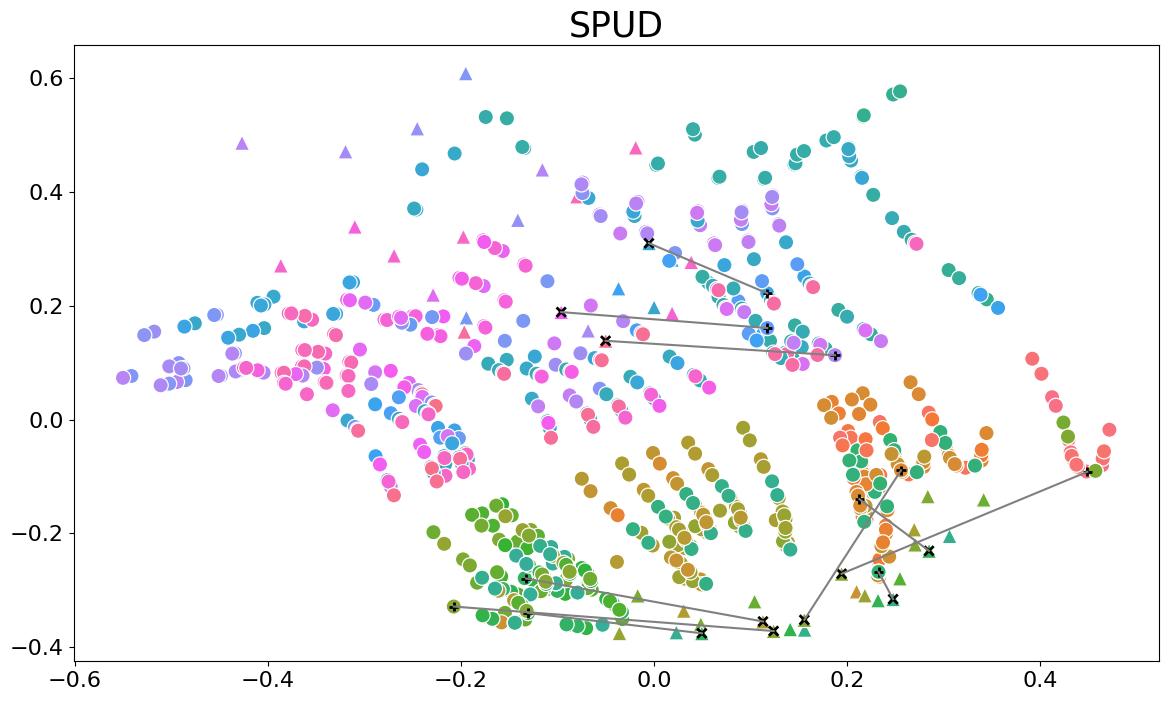

In [7]:
sclass.plot_emb(ch_spud.labels_doubled, show_legend = False, show_lines = False)

In [4]:
#Find out how good our error is
import numpy as np
np.mean(ch_spud.labels), np.max(ch_spud.labels), np.min(ch_spud.labels), np.std(ch_spud.labels)

(3.1456319031046104e-16,
 2.46415290981165,
 -1.43880172112539,
 0.9993487462676213)

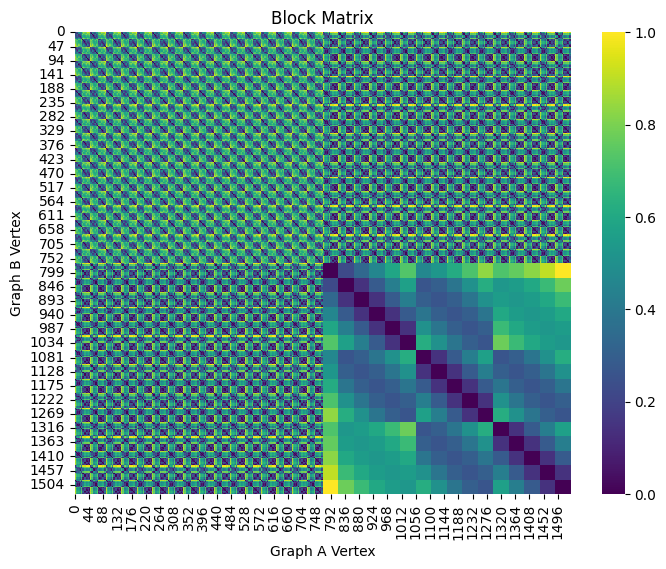

In [4]:
sclass.plot_heat_map()

In [6]:
ch_spud.split_A.shape, ch_spud.split_B.shape

((768, 6), (768, 2))

# MASH

In [8]:
from mashspud import MASH
stock = tma("IstanbulStock.csv", verbose=4, split = "distort")

Creating a mirror dataset and distorting the features in the second Domain
Split A features shape: (536, 8)
Split B Features shape (536, 8)
MDS initialized with 8 components

 
 
---------------------------       Initalizing class with IstanbulStock.csv data       ---------------------------

The knn values are: (2, 13, 24, 35, 46, 57, 68, 79, 90, 101)


In [14]:
mash_stock = MASH(verbose = 4, DTM = "log", knn = 10)
mash_stock.fit(stock.split_A, stock.split_B, known_anchors=stock.anchors)

Time Data Below
 Time it took to execute the graph for domain A:  0.36068
 Time it took to compute kernal A:  0.00101
 Time it took to execute the graph for domain B:  0.08335
 Time it took to compute kernal B:  0.00034
 Time it took to compute merge_graphs function:  0.55737
 Time it took to compute similarity_matrix function:  0.00506
Using optimal t value of 17
 Time it took to compute diffusion process:  0.71729
Fit process finished. We recommend calling optimize_by_creating_connections.


Calculating the R squared score.
Cross Embedding score: 0.5036270732625712
Fraction of Samples Closest to thier Match: 0.009022053909556694


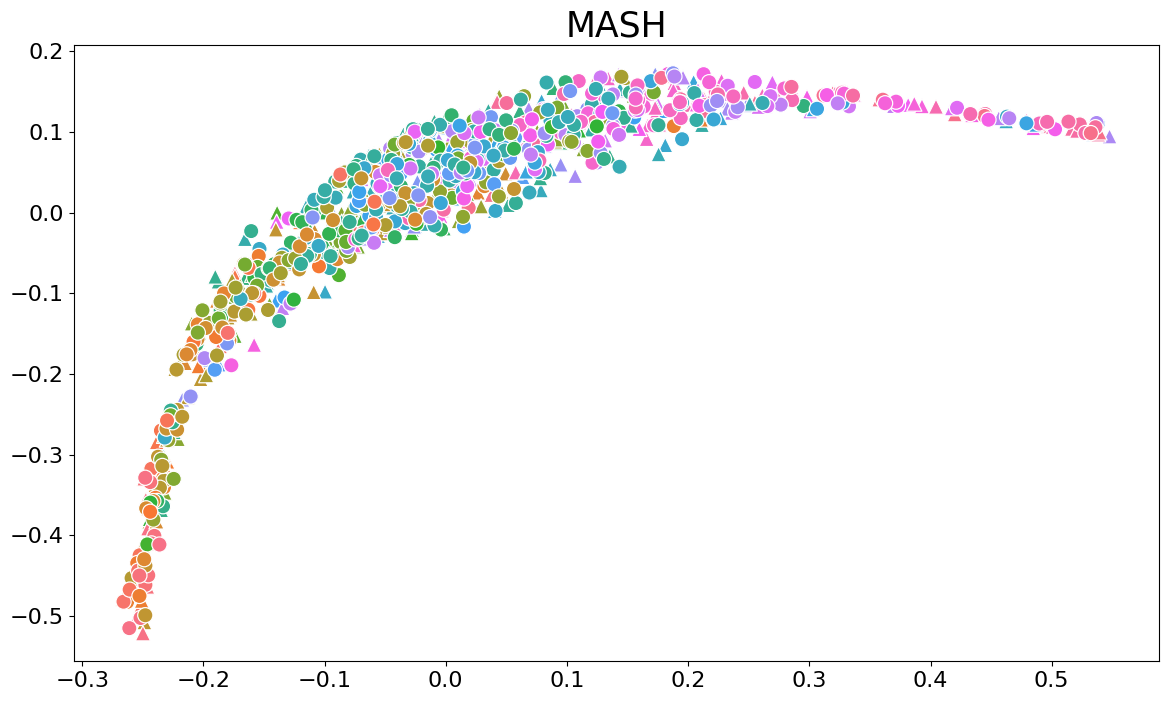

In [16]:
mash_stock.plot_emb(stock.labels_doubled, show_anchors = False, show_legend = False, show_lines = False)

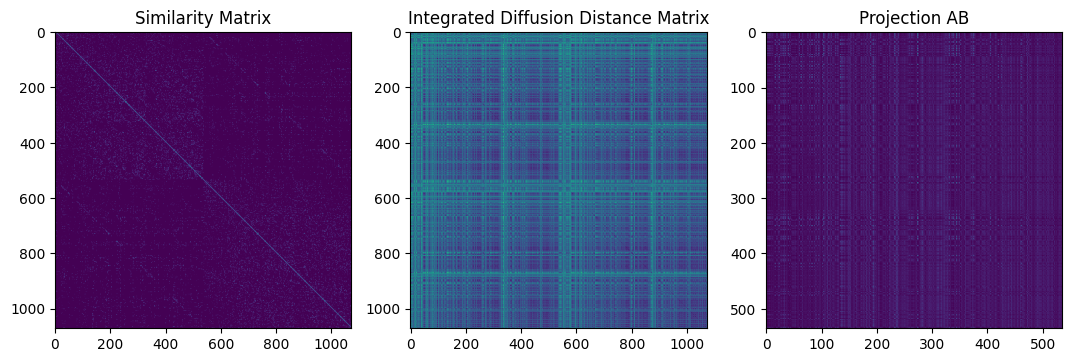

In [13]:
mash_stock.plot_heat_maps()